In [1]:
import pandas as pd
# 数据加载
#file_dir = '/Volumes/GoogleDrive/我的雲端硬碟/python/東海大學/Ｒ程式語言實作/國泰金控大數據比賽原始資料/'
file_dir = 'G:/我的雲端硬碟/python/東海大學/Ｒ程式語言實作/國泰金控大數據比賽原始資料/'
train_buy_data = pd.read_csv(file_dir + 'train_buy_info.csv')
train_cust_data = pd.read_csv(file_dir + 'train_cust_info.csv')
train_tpy_data = pd.read_csv(file_dir + 'train_tpy_info.csv')

test_buy_x_data = pd.read_csv(file_dir + 'test_buy_x_info.csv')
test_cust_x_data = pd.read_csv(file_dir + 'test_cust_x_info.csv')
test_tpy_x_data = pd.read_csv(file_dir + 'test_tpy_x_info.csv')

"""
test集未包含y預測值
1. 依據train建立模型
2. K折拆分預測模型準確率
3. 將test集輸入模型，輸出結果，將結果寫進excel檔中
"""


# test_data = pd.read_csv('./Titanic_Data/test.csv')
# 数据探索
# print(train_data.info())
# print('-'*30)
# print(train_data.describe())
# print('-'*30)
# print(train_data.describe(include=['O']))
# print('-'*30)
# print(train_data.head())
# print('-'*30)
# print(train_data.tail())

'\ntest集未包含y預測值\n1. 依據train建立模型\n2. K折拆分預測模型準確率\n3. 將test集輸入模型，輸出結果，將結果寫進excel檔中\n'

In [2]:
print(train_buy_data.info())
"""
看個欄位儲存的資料格式，確認欄位數，缺值數。

1. 13個欄位有['CUST_ID', 'BUY_TYPE', 'AGE', 'SEX', 'HEIGHT', 'WEIGHT', 'OCCUPATION',
       'CHILD_NUM', 'BUY_MONTH', 'BUY_YEAR', 'CITY_CODE', 'BUDGET',
       'MARRIAGE']
2. 229504筆資料，其中HEIGHT, WEIGHT有缺值
3. Buy_type有7種，該欄取為預測的y值
"""

print('-'*30)
print(train_buy_data.describe())
"""
僅列出int, float欄位
"""
print('-'*30)
print(train_buy_data.describe(include=['O']))
"""
describe出object的欄位
1. buy_year可以drop掉，因為資料都是同一年
2. occupation職業別
"""
print('-'*30)
print(train_buy_data.head())
print('-'*30)
print(train_buy_data.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229504 entries, 0 to 229503
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   CUST_ID     229504 non-null  int64  
 1   BUY_TYPE    229504 non-null  object 
 2   AGE         229504 non-null  object 
 3   SEX         229504 non-null  object 
 4   HEIGHT      212696 non-null  float64
 5   WEIGHT      212696 non-null  float64
 6   OCCUPATION  229504 non-null  object 
 7   CHILD_NUM   229504 non-null  int64  
 8   BUY_MONTH   229504 non-null  int64  
 9   BUY_YEAR    229504 non-null  object 
 10  CITY_CODE   229504 non-null  object 
 11  BUDGET      229504 non-null  float64
 12  MARRIAGE    229504 non-null  object 
dtypes: float64(3), int64(3), object(7)
memory usage: 22.8+ MB
None
------------------------------
            CUST_ID         HEIGHT         WEIGHT      CHILD_NUM  \
count  2.295040e+05  212696.000000  212696.000000  229504.000000   
mean   1.497660e+06     

In [3]:
train_buy_data['HEIGHT'].fillna(train_buy_data['HEIGHT'].mean(), inplace=True)
train_buy_data['WEIGHT'].fillna(train_buy_data['WEIGHT'].mean(), inplace=True)
train_buy_data['BUY_TYPE']=train_buy_data['BUY_TYPE'].map({'a':1,'d':2, 'e':3, 'f':4, 'c':5, 'b':6, 'g':7})
train_buy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229504 entries, 0 to 229503
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   CUST_ID     229504 non-null  int64  
 1   BUY_TYPE    229504 non-null  int64  
 2   AGE         229504 non-null  object 
 3   SEX         229504 non-null  object 
 4   HEIGHT      229504 non-null  float64
 5   WEIGHT      229504 non-null  float64
 6   OCCUPATION  229504 non-null  object 
 7   CHILD_NUM   229504 non-null  int64  
 8   BUY_MONTH   229504 non-null  int64  
 9   BUY_YEAR    229504 non-null  object 
 10  CITY_CODE   229504 non-null  object 
 11  BUDGET      229504 non-null  float64
 12  MARRIAGE    229504 non-null  object 
dtypes: float64(3), int64(4), object(6)
memory usage: 22.8+ MB


d:\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


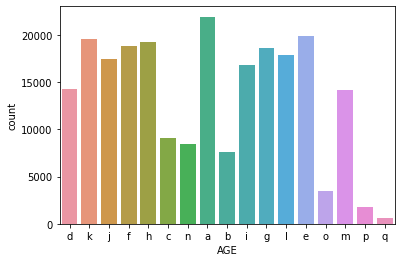

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(train_buy_data['AGE'],label="Count")
plt.show()

In [5]:
#計算各個值的個數
print(train_buy_data['AGE'].value_counts())
age_count = train_buy_data['AGE'].value_counts()

age_dict = {}
for k,v in enumerate(age_count.index):
    age_dict[v] = k
print(age_dict)

train_buy_data['AGE']=train_buy_data['AGE'].map(age_dict)

a    21905
e    19845
k    19530
h    19257
f    18860
g    18560
l    17857
j    17467
i    16797
d    14273
m    14123
c     9116
n     8430
b     7557
o     3507
p     1754
q      666
Name: AGE, dtype: int64
{'a': 0, 'e': 1, 'k': 2, 'h': 3, 'f': 4, 'g': 5, 'l': 6, 'j': 7, 'i': 8, 'd': 9, 'm': 10, 'c': 11, 'n': 12, 'b': 13, 'o': 14, 'p': 15, 'q': 16}


d:\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


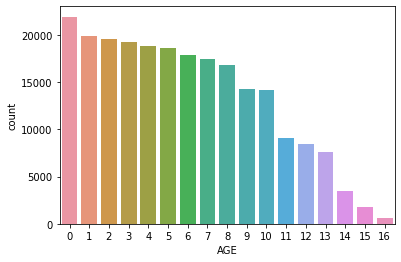

In [6]:
sns.countplot(train_buy_data['AGE'],label="Count")
plt.show()

d:\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


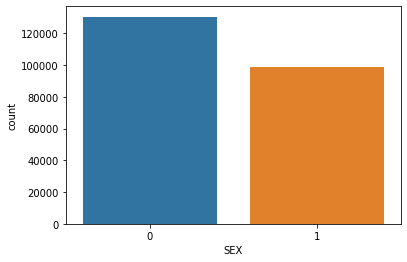

In [7]:
train_buy_data['SEX']=train_buy_data['SEX'].map({'a':0,'b':1})

sns.countplot(train_buy_data['SEX'],label="Count")
plt.show()

d:\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


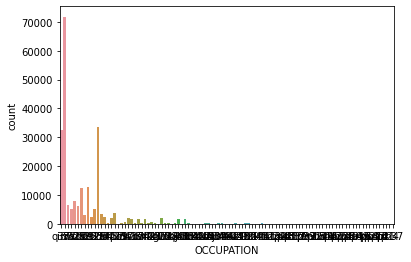

{'i37': 0, 't28': 1, 'q37': 2, 's32': 3, 'd32': 4, 'm28': 5, 'r37': 6, 'a37': 7, 'r32': 8, 'e37': 9, 'n37': 10, 'l37': 11, 'd29': 12, 'd12': 13, 'd37': 14, 'd42': 15, 'd41': 16, 'g28': 17, 'd7': 18, 'b28': 19, 'q41': 20, 'd38': 21, 's41': 22, 'n29': 23, 'c37': 24, 'r41': 25, 'd5': 26, 'j37': 27, 'l12': 28, 'd18': 29, 'a41': 30, 'd46': 31, 's37': 32, 'k29': 33, 'u37': 34, 'd47': 35, 'o28': 36, 'k41': 37, 'd3': 38, 'e41': 39, 'd10': 40, 'l32': 41, 'l41': 42, 'f40': 43, 'f46': 44, 'd22': 45, 'f37': 46, 'u41': 47, 'h41': 48, 'k37': 49, 'r12': 50, 'd14': 51, 'j41': 52, 'n41': 53, 'v12': 54, 'f42': 55, 'c41': 56, 'k32': 57, 'n14': 58, 'd16': 59, 'n32': 60, 'd24': 61, 'f32': 62, 'n12': 63, 'f41': 64, 'c32': 65, 'k14': 66, 'h32': 67, 'p37': 68, 'v29': 69, 'f29': 70, 'k12': 71, 'p29': 72, 'NANA': 73, 'p22': 74, 'f12': 75, 'f14': 76, 'd40': 77, 'p32': 78, 'v41': 79, 'h37': 80, 'p19': 81, 'p43': 82, 'p6': 83, 'p38': 84, 'p49': 85, 'm37': 86, 'p4': 87, 'p15': 88, 'p11': 89, 'p42': 90, 'p9': 91, 'p

d:\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


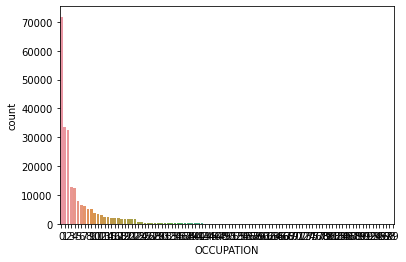

In [8]:
sns.countplot(train_buy_data['OCCUPATION'],label="Count")
plt.show()

occu_count = train_buy_data['OCCUPATION'].value_counts()

occu_dict = {}
for k,v in enumerate(occu_count.index):
    occu_dict[v] = k
print(occu_dict)

train_buy_data['OCCUPATION']=train_buy_data['OCCUPATION'].map(occu_dict)
sns.countplot(train_buy_data['OCCUPATION'],label="Count")
plt.show()

d:\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


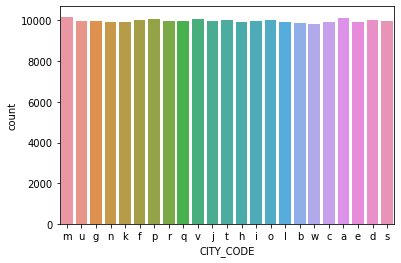

{'m': 0, 'a': 1, 'p': 2, 'v': 3, 'f': 4, 't': 5, 'o': 6, 'd': 7, 'i': 8, 'r': 9, 'j': 10, 's': 11, 'q': 12, 'g': 13, 'u': 14, 'e': 15, 'c': 16, 'h': 17, 'n': 18, 'k': 19, 'l': 20, 'b': 21, 'w': 22}


d:\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


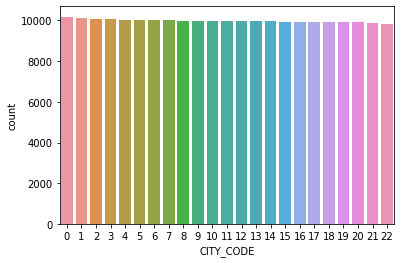

In [12]:
sns.countplot(train_buy_data['CITY_CODE'],label="Count")
plt.show()

code_count = train_buy_data['CITY_CODE'].value_counts()

code_dict = {}
for k,v in enumerate(code_count.index):
    code_dict[v] = k
print(code_dict)

train_buy_data['CITY_CODE']=train_buy_data['CITY_CODE'].map(code_dict)
sns.countplot(train_buy_data['CITY_CODE'],label="Count")
plt.show()

d:\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


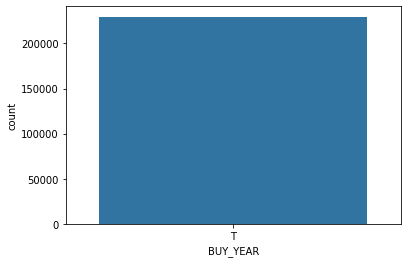

In [15]:
sns.countplot(train_buy_data['BUY_YEAR'],label="Count")
plt.show()
train_buy_data.drop(['BUY_YEAR'], inplace=True, axis =1)

d:\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


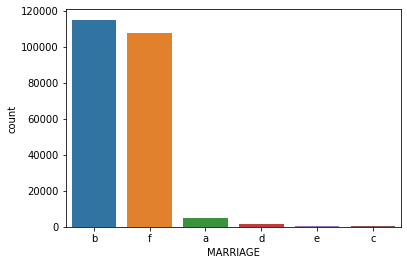

d:\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


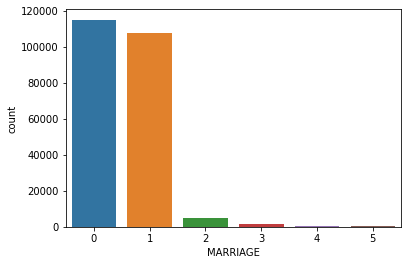

In [19]:
sns.countplot(train_buy_data['MARRIAGE'],label="Count")
plt.show()

train_buy_data['MARRIAGE']=train_buy_data['MARRIAGE'].map({'b':0,'f':1,'a':2,'d':3,'e':4,'c':5})
sns.countplot(train_buy_data['MARRIAGE'],label="Count")
plt.show()

In [20]:
# train_buy_data.to_csv("tmp_cathy.csv")

In [1]:
import pandas as pd
train_buy_data = pd.read_csv("tmp_cathy.csv")
train_buy_data.drop(['CUST_ID'], inplace=True, axis =1)

In [2]:
from sklearn.model_selection import train_test_split

features = [ 'AGE',
 'SEX',
 'HEIGHT',
 'OCCUPATION',
 'CHILD_NUM',
 'BUY_MONTH',
 'CITY_CODE',
 'BUDGET',
 'MARRIAGE']

train_buy, test_buy = train_test_split(train_buy_data, test_size = 0.3)
train_x = train_buy[features]
train_y = train_buy['BUY_TYPE']
test_x = test_buy[features]
test_y =test_buy['BUY_TYPE']

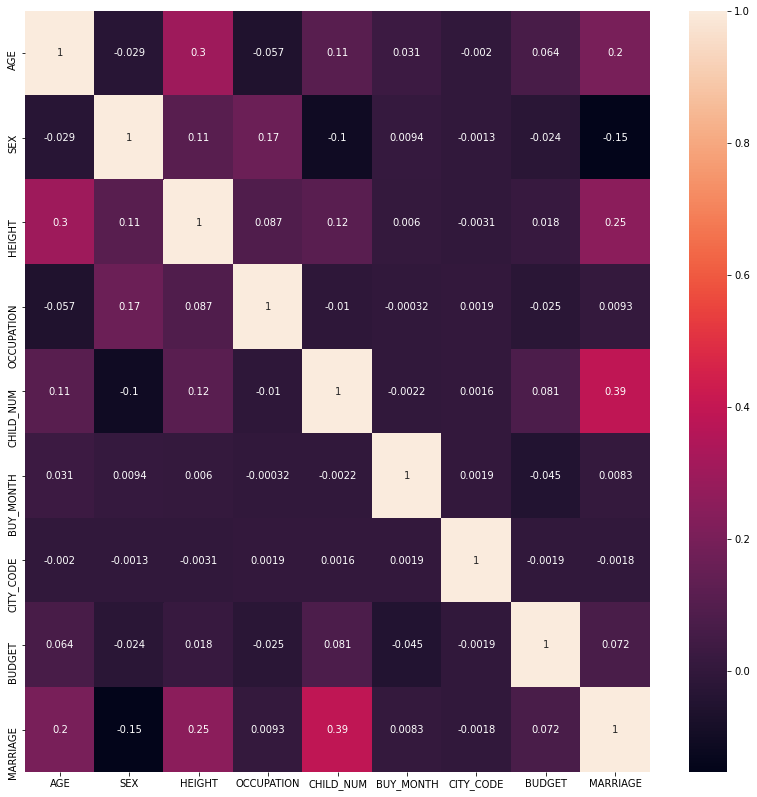

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = train_buy_data[features].corr()
plt.figure(figsize=(14,14))
# annot=True显示每个方格的数据
sns.heatmap(corr, annot=True)
plt.show()

In [ ]:
from sklearn import svm
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
train_x = ss.fit_transform(train_x)
test_x = ss.transform(test_x)

# 创建SVM分类器
model = svm.SVC()
# 用训练集做训练
model.fit(train_x,train_y)
# 用测试集做预测
prediction=model.predict(test_x)
print('准确率: ', metrics.accuracy_score(test_x,prediction))